# Chapter 7. 인공신경망과 딥 러닝

> [분석스토리]  
어느덧 병아리가 부화하고, 성장한 지 70일이 지났습니다. 이제 어엿한 닭으로 성장했지만 타사 대비 닭의 발육 상태가 떨어진 것을 확인했습니다. 이에 김 대표는 그 원인을 분석하기 시작했습니다. 그리고 도출한 결론은 종란 무게와 닭으로 성장할 때까지의 누적 사료량 관리가 가장 중요한 변수라고 판단했습니다. 따라서 앞으로 체계적인 닭의 발육관리를 위해 종란 무게 및 누적 사료량에 따른 닭의 몸무게 예측 모델을 개발하기로 했습니다.

## 1. 성장한 닭의 체중을 예측할 수 있을까? (회귀)

### 1-1. 인공신경망이란?

> 우리 몸의 신경세포(Neuron)는 수상 돌기(Dendrite)를 통해 전기적 신호를 입력받아 신호의 강도가 일정 기준을 초과할 때 즉, 역치 이상의 자극이 주어질 때 신경세포가 활성화되어 축삭 돌기(Axon)를 통해 신호를 내보냅니다. 이런 중추신경계를 모방하여 만들어진 머신러닝 알고리즘이 인공신경망(Artificial Neural Network)입니다.
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Neuron_Hand-tuned.svg/400px-Neuron_Hand-tuned.svg.png" width="500"/>
    <center>신경세포(출처 : wikipedia)</center>
</div>

### 1-2. 데이터 및 상관관계 확인

In [1]:
import pandas as pd
w = pd.read_csv("ch7-1.csv")

In [2]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   egg_weight  300 non-null    int64
 1   acc_food    300 non-null    int64
 2   weight      300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [3]:
w.head()

,egg_weight,acc_food,weight
0,69,10602,4128
1,76,10640,4104
2,76,10898,4119
3,71,10384,4127
4,71,10709,4112


In [4]:
# 상관분석 실시
w_cor = w.corr(method = 'pearson')
w_cor

,egg_weight,acc_food,weight
egg_weight,1.000000,0.944810,0.779895
acc_food,0.944810,1.000000,0.790082
weight,0.779895,0.790082,1.000000


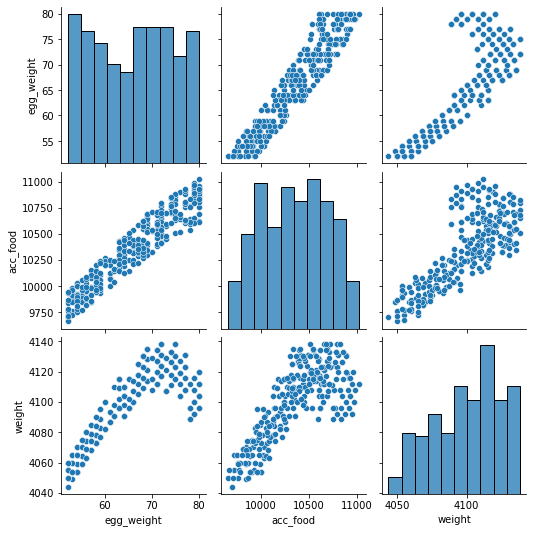

In [5]:
# 상관관계 시각화
import seaborn as sns
sns.pairplot(w)

### 1-3. 데이터 분할하기

In [6]:
# 데이터셋 x, y로 분할, ndarray 타입
x_data = w.iloc[:,0:2].values
y_data = w.iloc[:,2].values

In [8]:
# 데이터 셋 분할을 위한 함수 불러오기
from sklearn.model_selection import train_test_split

In [9]:
# 훈련용과 테스트용 8:2로 분할 실시
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [30]:
# 데이터 분할 후 행수 확인
len(pd.DataFrame(x_train)), len(pd.DataFrame(x_test))

(240, 60)

### 1-4. 신경망 구현

In [33]:
# MLP 알고리즘 수행을 위한 함수 불러오기
from sklearn.neural_network import MLPRegressor

In [34]:
# 모델 구축 및 학습
model_mlp = MLPRegressor().fit(x_train, y_train)

In [35]:
# 모델 파라미터 확인
model_mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [36]:
# 예측값 생성
y_pred_mlp = model_mlp.predict(x_test)

In [37]:
# 예측값 확인
y_pred_mlp

array([4156.78834546, 4050.47878433, 4224.95699923, 4099.01903465,
       4072.03712254, 4340.62796566, 4472.36933027, 4071.44698972,
       4405.82874699, 4067.87538872, 4112.43702043, 4251.09768462,
       4311.42785023, 4115.37770139, 4148.54283969, 4032.47845137,
       4248.23496553, 4207.5467991 , 4345.82763713, 4271.14670142,
       4149.88264163, 4264.00349944, 4189.86192616, 4122.41575003,
       4322.61403696, 4356.08103954, 4186.3039209 , 4400.73422886,
       4269.21676665, 4280.20624244, 4313.9751093 , 4375.3160211 ,
       4180.27661844, 4381.01426781, 4358.50954954, 4223.72235063,
       4458.95134449, 4353.04880099, 4370.1435411 , 4092.90017459,
       4007.03305215, 4268.49428901, 4029.91759657, 4295.67291206,
       4235.53945739, 4311.21754355, 4218.12925726, 4065.22297632,
       4062.99117726, 4375.82819206, 4267.78540711, 4223.82750397,
       4189.84833042, 4258.30525273, 4323.84868556, 4080.40137739,
       4345.82763713, 4225.95414968, 3998.07866447, 4049.87505

### 1-5. 회귀모델의 성능 평가

In [41]:
# 회귀성능 지표 계산용 함수 불러오기 및 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# squared = True일 경우 MSE, False일 경우는 RMSE
RMSE = mean_squared_error(y_test, y_pred_mlp, squared = False)
MAE = mean_absolute_error(y_test, y_pred_mlp)
R2 = r2_score(y_test, y_pred_mlp)

In [42]:
RMSE, MAE, R2

(161.82660022130042, 132.12576946585412, -44.615239782764775)

### 1-7. H2O 활용 딥 러닝 구현(회귀)

In [2]:
# 데이터셋 8:2 분할
from sklearn.model_selection import train_test_split
train, test = train_test_split(w, test_size=0.2)

In [46]:
# H2O 의존 패키지 설치
!pip install requests
!pip install tabulate
!pip install future

In [4]:
# H2O 패키지 설치
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [5]:
# H2O 패키지 실행
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,6 mins 22 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,21 days and 35 minutes
H2O_cluster_name:,H2O_from_python_nosense_9js3js
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.953 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [8]:
# 훈련용 데이터셋 H2O 전용 데이터프레임으로 변환
hf_train = h2o.H2OFrame(train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
# 테스트용 데이터셋 H2O 전용 데이터프레임으로 변환
hf_test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [31]:
hf_train.structure()

H2OFrame: 'Key_Frame__upload_bcd51246251ac3df3806c2ba60194e43.hex' 
Dimensions: 240 obs. of 3 variables
$ egg_weight :  num 79 71 74 59 54 74 58 79 62 79
$ acc_food   :  num 10823 10611 10856 9983 9998 10842 10140 10949 10142 10918
$ weight     :  num 4108 4134 4133 4077 4054 4126 4084 4092 4110 4116


In [32]:
hf_test.structure()

H2OFrame: 'Key_Frame__upload_baf952c48823ab7e6f52c2899a4e44e0.hex' 
Dimensions: 60 obs. of 3 variables
$ egg_weight :  num 62 55 64 54 59 71 80 53 78 56
$ acc_food   :  num 10166 9910 10332 10030 9960 10611 10928 9963 10766 9952
$ weight     :  num 4091 4075 4110 4070 4095 4134 4104 4054 4096 4080


In [24]:
# 딥러닝 구현을 위한 함수 불러오기
from h2o.estimators import H2ODeepLearningEstimator
# 모델 구축 및 학습
model_h2o = H2ODeepLearningEstimator().train(x=['egg_weight','acc_food'], y='weight', training_frame=hf_train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


In [25]:
# 모델 정보 확인
model_h2o

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1644925253288_2


Status of Neuron Layers: predicting weight, regression, gaussian distribution, Quadratic loss, 41,001 weights/biases, 488.6 KB, 2,400 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,2,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.00960303,0.00670159,0,-0.00369656,0.117065,0.478553,0.0191746
2,,3,200,Rectifier,0,0,0,0.100458,0.188097,0,-0.00778299,0.0709496,0.984798,0.0127437
3,,4,1,Linear,,0,0,0.000701913,0.00125364,0,-0.00606226,0.0639031,-0.00102524,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 115.70025031687932
RMSE: 10.756405083338919
MAE: 8.566932378723234
RMSLE: 0.0026164770831522996
Mean Residual Deviance: 115.70025031687932

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-02-15 22:04:02,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-02-15 22:04:02,0.096 sec,5853 obs/sec,1.0,1,240.0,15.057890,226.74005,12.407975,0.624048
2,,2022-02-15 22:04:02,0.470 sec,5911 obs/sec,10.0,10,2400.0,10.756405,115.70025,8.566932,0.808160



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,acc_food,1.000000,1.000000,0.515204
1,egg_weight,0.940979,0.940979,0.484796


In [26]:
# 모델 성능만 확인
model_h2o.model_performance()


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 115.70025031687932
RMSE: 10.756405083338919
MAE: 8.566932378723234
RMSLE: 0.0026164770831522996
Mean Residual Deviance: 115.70025031687932


In [27]:
# 모델 성능지표 R2 확인
model_h2o.r2()

0.8081604788838568

In [28]:
# 예측값 생성
y_pred_h2o = model_h2o.predict(hf_test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [29]:
y_pred_h2o.head(5)

predict
4111
4098.48
4109.39
4116.96
4114.43


In [30]:
# 테스트용 데이터셋에 예측값 predict열로 추가
hf_result = hf_test.cbind(y_pred_h2o)

In [31]:
hf_result.head(5)

egg_weight,acc_food,weight,predict
75,10780,4115,4111
63,10297,4109,4098.48
77,10757,4108,4109.39
69,10547,4135,4116.96
72,10610,4117,4114.43


In [38]:
# sklearn.metrics 모듈 이용을 위해 데이터셋을 h2oframe에서 ndarray로 변경
y_test2 = hf_result[2].as_data_frame().values
y_pred_h2o = hf_result[3].as_data_frame().values

In [39]:
# 회귀성능 지표 계산용 함수 불러오기 및 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# squared = True일 경우 MSE, False일 경우는 RMSE
RMSE = mean_squared_error(y_test2, y_pred_h2o, squared = False)
MAE = mean_absolute_error(y_test2, y_pred_h2o)
R2 = r2_score(y_test2, y_pred_h2o)

In [40]:
RMSE, MAE, R2

(9.778786204520141, 7.999860805244899, 0.8320701641004156)

---

## 2. 딥 러닝을 이용해 병아리의 품종을 다시 구분해 보자! (분류)

### 2-1. Keras 활용 딥 러닝 구현(분류)

In [1]:
# tensorflow & keras 설치
!pip install tensorflow
!pip install keras

In [2]:
# 딥 러닝용 함수 불러오기
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense

In [3]:
# 실습용 데이터 불러오기
import pandas as pd
df_train = pd.read_csv('ch6-2_train.csv')
df_test = pd.read_csv('ch6-2_test.csv')

In [4]:
# train, test 데이터셋 각각 x, y로 분할, ndarray 타입
x_train = df_train.iloc[:,0:3].values
y_train = df_train.iloc[:,3].values
x_test = df_test.iloc[:,0:3].values
y_test = df_test.iloc[:,3].values

In [5]:
# 독립변수 분포 확인
df_test.describe()

,wing_length,tail_length,comb_height
count,60.000000,60.000000,60.000000
mean,237.983333,68.383333,34.066667
std,13.663624,3.527575,1.998870
min,211.000000,62.000000,30.000000
25%,228.750000,65.750000,33.000000
50%,238.500000,68.500000,34.000000
75%,250.000000,71.000000,35.000000
max,260.000000,74.000000,38.000000


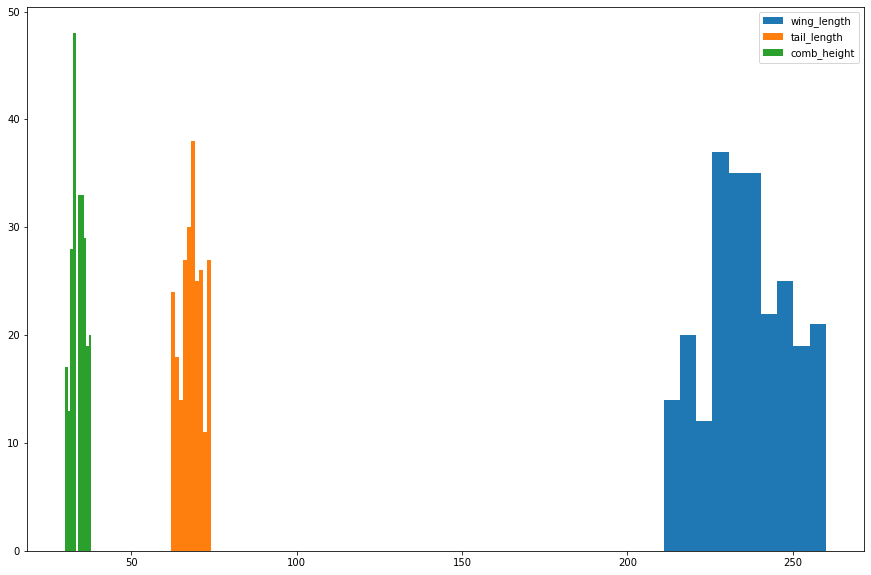

In [6]:
# 히스토그램으로 독립변수 분포 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.hist(df_train.wing_length, label = 'wing_length')
plt.hist(df_train.tail_length, label = 'tail_length')
plt.hist(df_train.comb_height, label = 'comb_height')
plt.legend()
plt.show()

In [7]:
# Min-Max Scaling을 위한 함수 불러오기
from sklearn.preprocessing import MinMaxScaler
# x_train 데이터로 학습한 Min-Max Scaler 생성
mms = MinMaxScaler().fit(x_train)

In [8]:
# 스케일링 실시
mm_x_train = mms.transform(x_train)
mm_x_test = mms.transform(x_test)

In [9]:
# 스케일링 결과 확인
mm_x_train[0:5]

array([[0.55102041, 0.08333333, 0.5       ],
       [0.51020408, 0.41666667, 0.        ],
       [0.91836735, 0.25      , 0.5       ],
       [0.59183673, 0.08333333, 0.625     ],
       [0.71428571, 0.25      , 0.        ]])

In [10]:
# 최솟값, 최댓값 확인
mm_x_train.min(), mm_x_train.max()

(0.0, 1.0)

In [11]:
# 종속변수 확인
y_train[0:5]

array(['a', 'a', 'a', 'a', 'a'], dtype=object)

In [12]:
# One-Hot Encoding을 위한 함수 불러오기
from sklearn.preprocessing import LabelBinarizer
# y_train 데이터로 학습한 LabelBinarizer 생성
lb = LabelBinarizer().fit(y_train)

In [13]:
# 종속변수 a, b, c를 이진수로 One-Hot Encoding
o_y_train = lb.transform(y_train)
o_y_test = lb.transform(y_test)

In [14]:
# One-Hot Encoding 결과 확인
o_y_train[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [15]:
# 모델 구축
model = Sequential()
model.add(Input(3))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [16]:
# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 학습 설정(compile)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [18]:
# 모델 학습(fit) 실시
history = model.fit(mm_x_train, o_y_train, epochs = 300, batch_size = 16, validation_split = 0.2)

Epoch 1/300
12/12 [==============================] - 1s 15ms/step - loss: 1.0769 - accuracy: 0.4167 - val_loss: 1.1230 - val_accuracy: 0.0000e+00
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0532 - accuracy: 0.4167 - val_loss: 1.1699 - val_accuracy: 0.0000e+00
Epoch 3/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0314 - accuracy: 0.4167 - val_loss: 1.2064 - val_accuracy: 0.0000e+00
Epoch 4/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0125 - accuracy: 0.4167 - val_loss: 1.2331 - val_accuracy: 0.0000e+00
Epoch 5/300
12/12 [==============================] - 0s 3ms/step - loss: 0.9951 - accuracy: 0.4167 - val_loss: 1.2586 - val_accuracy: 0.0000e+00
Epoch 6/300
12/12 [==============================] - 0s 3ms/step - loss: 0.9783 - accuracy: 0.4167 - val_loss: 1.2856 - val_accuracy: 0.0000e+00
Epoch 7/300
12/12 [==============================] - 0s 3ms/step - loss: 0.9616 - accuracy: 0.4271 - val_loss: 1.3093 - val_accur

Epoch 116/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9479 - val_loss: 0.3162 - val_accuracy: 0.8333
Epoch 117/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.9479 - val_loss: 0.3547 - val_accuracy: 0.8333
Epoch 118/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1617 - accuracy: 0.9375 - val_loss: 0.3813 - val_accuracy: 0.8125
Epoch 119/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1574 - accuracy: 0.9479 - val_loss: 0.2828 - val_accuracy: 0.8750
Epoch 120/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.9323 - val_loss: 0.3142 - val_accuracy: 0.8542
Epoch 121/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.9479 - val_loss: 0.3295 - val_accuracy: 0.8542
Epoch 122/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1566 - accuracy: 0.9427 - val_loss: 0.3234 - val_accuracy: 0.8542

12/12 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9479 - val_loss: 0.2729 - val_accuracy: 0.9167
Epoch 231/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1317 - accuracy: 0.9531 - val_loss: 0.2630 - val_accuracy: 0.9167
Epoch 232/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.9531 - val_loss: 0.2724 - val_accuracy: 0.9167
Epoch 233/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.9531 - val_loss: 0.2923 - val_accuracy: 0.8958
Epoch 234/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9531 - val_loss: 0.2681 - val_accuracy: 0.9375
Epoch 235/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1326 - accuracy: 0.9479 - val_loss: 0.2867 - val_accuracy: 0.8958
Epoch 236/300
12/12 [==============================] - 0s 3ms/step - loss: 0.1306 - accuracy: 0.9479 - val_loss: 0.2604 - val_accuracy: 0.9167
Epoch 237/300

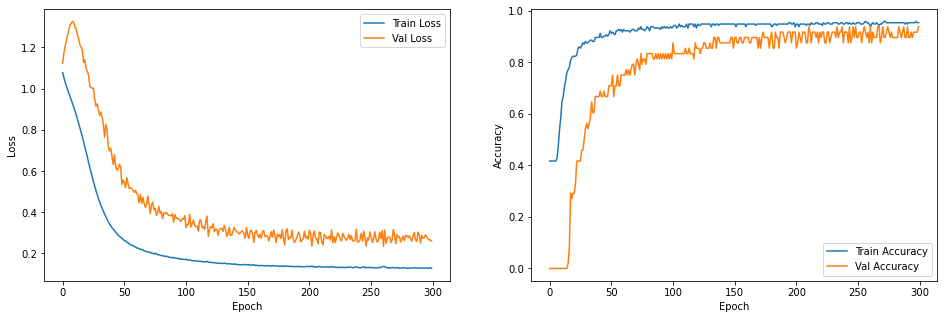

In [20]:
# 학습 결과 그래프 표시
plt.figure(figsize = (16,5))
plt.subplot(1,2,1) # 그래프 좌측 표시
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.subplot(1,2,2) # 그래프 우측 표시
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.legend()
plt.show()

In [21]:
# 모델 훈련성능(loss, accuracy) 확인
model.evaluate(mm_x_train, o_y_train)

8/8 [==============================] - 0s 2ms/step - loss: 0.1533 - accuracy: 0.9500


[0.15334415435791016, 0.949999988079071]

In [45]:
# 모델 테스트성능(loss, accuracy) 확인
model.evaluate(mm_x_test, o_y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.2718 - accuracy: 0.9333


[0.2718329131603241, 0.9333333373069763]

In [48]:
# 테스트용 데이터셋 활용 예측값 생성
y_pred = model.predict(mm_x_test)

In [49]:
# 예측값 확인
y_pred[0:5]

array([[9.9719489e-01, 1.6847164e-04, 2.6366785e-03],
       [9.9991083e-01, 3.7987818e-05, 5.1129409e-05],
       [9.9976295e-01, 1.2653900e-04, 1.1047870e-04],
       [9.9964440e-01, 1.9506643e-04, 1.6054725e-04],
       [9.9986064e-01, 7.6530843e-05, 6.2835170e-05]], dtype=float32)

In [50]:
# 예측값 반올림
y_pred = y_pred.round()

In [51]:
# 예측값 확인
y_pred[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [52]:
import numpy as np
# 배열에서 열 기준 가장 큰 값의 인덱스 호출 및 배열 차원 축소
y_pred = np.argmax(y_pred, axis=1).reshape(-1)

In [53]:
# 변환된 예측값 확인
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [56]:
# 예측값 배열의 0을 a로, 1을 b로, 2를 c로 변경
condlist = [y_pred == 0, y_pred == 1, y_pred == 2]
choicelist = ['a', 'b', 'c']
y_pred = np.select(condlist, choicelist)

In [57]:
# 변환된 예측값과 실제값 확인
print(y_pred[0:5], y_test[0:5])

['a' 'a' 'a' 'a' 'a'] ['a' 'a' 'a' 'a' 'a']


In [32]:
from sklearn.metrics import confusion_matrix
# 위쪽이 예측값, 좌측이 실제값
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 1, 17,  2],
       [ 0,  1, 19]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



### 2-2. 과적합을 줄이는 방법(드롭아웃)

In [34]:
from keras.layers import Dropout

In [35]:
# 모델 구축
model_d = Sequential()
model_d.add(Input(3))
model_d.add(Dense(16, activation = 'relu'))
model_d.add(Dropout(0.4))
model_d.add(Dense(16, activation = 'relu'))
model_d.add(Dropout(0.4))
model_d.add(Dense(3, activation = 'softmax'))

In [36]:
model_d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                64        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
